In [1]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 41.3MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.8MB/s]


In [3]:
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np


In [5]:
list_cats = ['/content/dogs_vs_cats/train/cats/cat.0.jpg', '/content/dogs_vs_cats/train/cats/cat.1.jpg']

In [6]:
def plot_images_from_directory(Path_name,class_animal, num_images=9):
  # Retrieve list of all files in directory
  image_filenames = os.listdir(Path_name)

  # if fewer images then requested
  if len(image_filenames) < num_images:
    print("Found {} images !!".format(len(image_filenames)))

  # Select num_images of file names
  selected_images = random.sample(image_filenames , num_images)
  # Plotting the images
  fig, axes = plt.subplots(3, 3, figsize=(5,5))  # Adjust the size as needed
  axes = axes.ravel()
  for i, image_file in enumerate(selected_images):
      image_path = os.path.join(Path_name, image_file)
      image = Image.open(image_path)
      axes[i].imshow(image)
      axes[i].set_title(f"Image: {class_animal}")
      axes[i].axis('off')  # Hide the axis

  plt.tight_layout()
  plt.show()



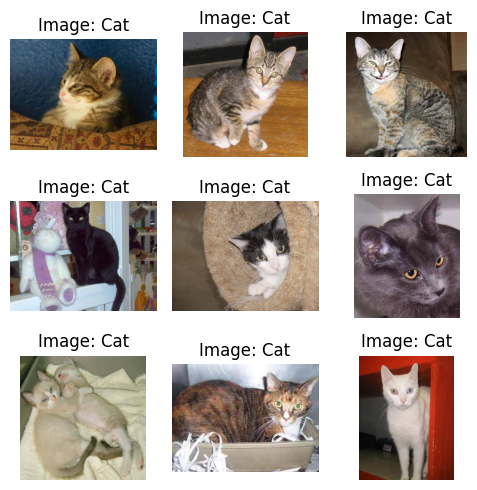

In [7]:
# Display selected cat images
cat_path = "/content/dogs_vs_cats/train/cats"
plot_images_from_directory(cat_path, class_animal = 'Cat')


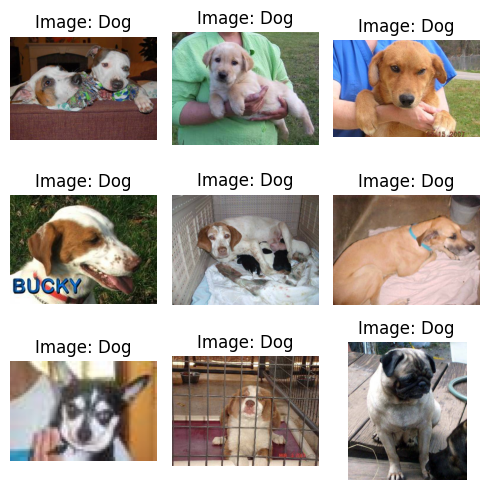

In [8]:
# Placeholder for the directory path
dog_directory_path = '/content/dogs_vs_cats/train/dogs'  # Replace with your directory path
plot_images_from_directory(dog_directory_path, class_animal = 'Dog')

In [9]:
#Calculating total cat iamges and total dog images
cat_images = os.listdir("/content/dogs_vs_cats/train/cats")
dog_images = os.listdir("/content/dogs_vs_cats/train/dogs")
print(f"Total number of cat images:{len(cat_images)}")
print(f"Total number of dog images:{len(dog_images)}")


Total number of cat images:10000
Total number of dog images:10000


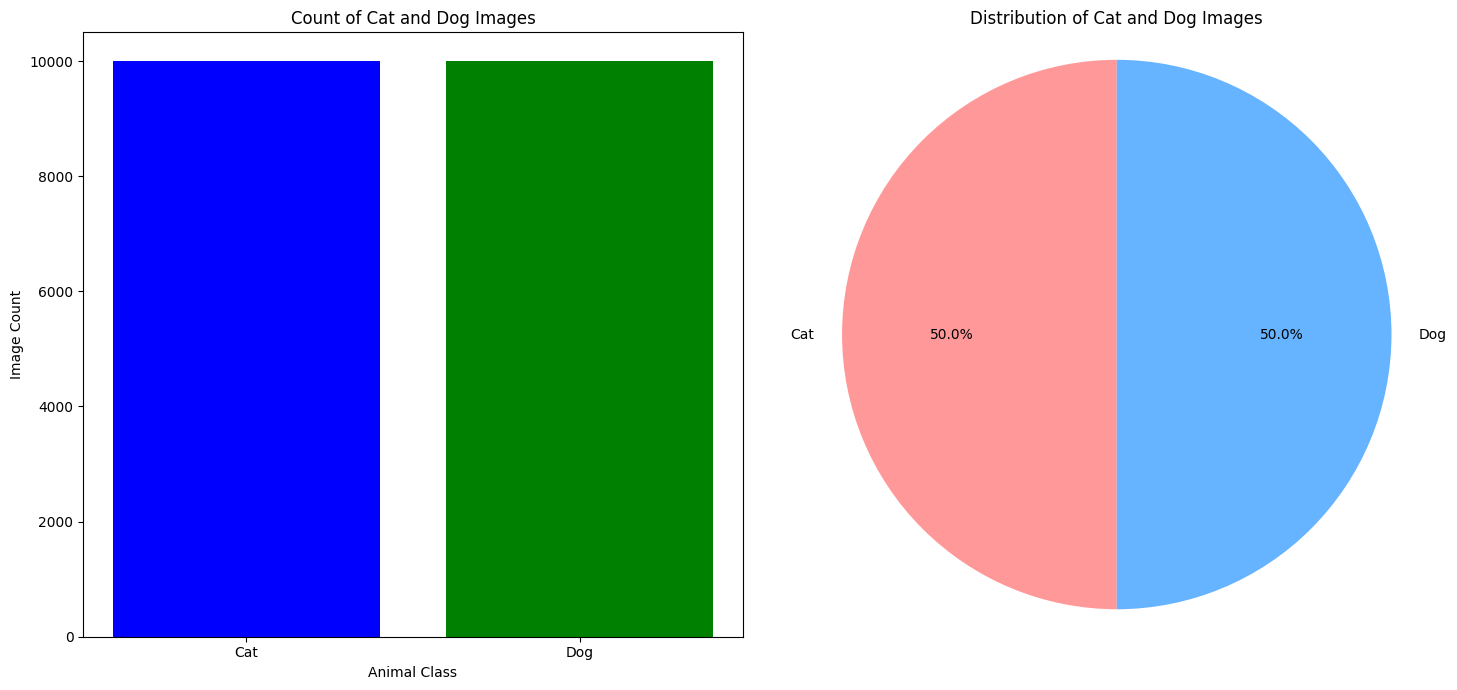

In [10]:
# Setting up a figure and axes for two subplots: one for the bar chart, one for the pie chart
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

#list of output classes and number of images in traning sample
classes_animals = ['Cat' ,'Dog']
count = [len(cat_images), len(dog_images)]

# Bar chart on the first subplot
ax[0].bar(classes_animals, count, color=['blue', 'green'])
ax[0].set_xlabel('Animal Class')
ax[0].set_ylabel('Image Count')
ax[0].set_title('Count of Cat and Dog Images')

# Pie chart on the second subplot
colors = ['#ff9999','#66b3ff']
ax[1].pie(count, labels=classes_animals, colors=colors, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Distribution of Cat and Dog Images')
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust the layout so that both subplots fit nicely
plt.tight_layout()
plt.show()

In [11]:
# Removing the corrupted images
import os
import imghdr # defining the type of image
from PIL import Image

#Define the list of acceptable image extensions
image_exts = ['jpg','png','jpeg']

data_dir = "/content/dogs_vs_cats"
def validate_images(directory):
  Corrupted_images = []

  for root,dirs,files in os.walk(data_dir):
    for file in files :
      if file.lower().endswith(tuple(image_exts)):
        image_path = os.path.join(root, file)
        try:
          with Image.open(image_path) as img:
            img.verify
        except:
          Corrupted_images.append(image_path)
          print(f'Corrupted images {image_path}')
  return Corrupted_images

# for cats
Corrupted_files = validate_images("/content/dogs_vs_cats/test/cats")
if Corrupted_files:
    print(f"Found {len(Corrupted_files)} corrupted images.")
else:
    print(f"All Cats images are valid!")

# for cats
Corrupted_files = validate_images("/content/dogs_vs_cats/test/dogs")
if Corrupted_files:
    print(f"Found {len(Corrupted_files)} corrupted images.")
else:
    print("All Dogs images are valid!")




All Cats images are valid!
All Dogs images are valid!


In [12]:
import cv2
# Loading Images and channels
ig = cv2.imread("/content/dogs_vs_cats/test/dogs/dog.10010.jpg")
if ig is not None:
  print(ig)
  print(ig.shape)
else:
  print("Could not load iamge .Please check the file path ")

[[[251 253 255]
  [246 248 255]
  [242 244 252]
  ...
  [248 254 249]
  [249 255 250]
  [253 255 254]]

 [[113 115 123]
  [103 105 113]
  [ 96  98 106]
  ...
  [ 41  47  42]
  [ 90  96  91]
  [219 222 220]]

 [[112 114 122]
  [102 104 112]
  [ 91  93 101]
  ...
  [ 44  50  45]
  [ 68  74  69]
  [243 246 244]]

 ...

 [[ 72  80  69]
  [ 85  93  82]
  [ 98 106  95]
  ...
  [ 94  98  92]
  [117 121 115]
  [255 255 252]]

 [[ 77  82  73]
  [ 96 101  92]
  [113 118 109]
  ...
  [ 81  85  80]
  [107 111 106]
  [229 230 226]]

 [[248 253 244]
  [249 254 245]
  [249 254 245]
  ...
  [253 255 252]
  [241 245 240]
  [255 255 252]]]
(316, 315, 3)


In [13]:
for i,j,k in os.walk('/content/dogs_vs_cats'):
    print(i,j,k)

/content/dogs_vs_cats ['train', 'test'] []
/content/dogs_vs_cats/train ['dogs', 'cats'] []
/content/dogs_vs_cats/train/dogs [] ['dog.9163.jpg', 'dog.6093.jpg', 'dog.4273.jpg', 'dog.6327.jpg', 'dog.3169.jpg', 'dog.2691.jpg', 'dog.2473.jpg', 'dog.2609.jpg', 'dog.2952.jpg', 'dog.4949.jpg', 'dog.7974.jpg', 'dog.3190.jpg', 'dog.5118.jpg', 'dog.10668.jpg', 'dog.9744.jpg', 'dog.4511.jpg', 'dog.12399.jpg', 'dog.693.jpg', 'dog.8784.jpg', 'dog.2226.jpg', 'dog.6096.jpg', 'dog.5657.jpg', 'dog.6185.jpg', 'dog.268.jpg', 'dog.4471.jpg', 'dog.2884.jpg', 'dog.3249.jpg', 'dog.1162.jpg', 'dog.9837.jpg', 'dog.9801.jpg', 'dog.5562.jpg', 'dog.7044.jpg', 'dog.2882.jpg', 'dog.10606.jpg', 'dog.5557.jpg', 'dog.7251.jpg', 'dog.4772.jpg', 'dog.7918.jpg', 'dog.1516.jpg', 'dog.7137.jpg', 'dog.3305.jpg', 'dog.9952.jpg', 'dog.281.jpg', 'dog.10469.jpg', 'dog.3451.jpg', 'dog.7728.jpg', 'dog.5815.jpg', 'dog.7983.jpg', 'dog.12432.jpg', 'dog.7424.jpg', 'dog.11518.jpg', 'dog.4923.jpg', 'dog.7399.jpg', 'dog.9763.jpg', 'dog.

Total Nr of Images in the dataset: 10000
        FileName  Width  Height  Aspect Ratio
0  cat.10860.jpg    499     458          1.09
1   cat.8781.jpg    327     300          1.09
2   cat.1381.jpg    355     403          0.88
3   cat.6309.jpg    498     314          1.59
4   cat.4826.jpg    500     374          1.34


Text(0, 0.5, 'Height')

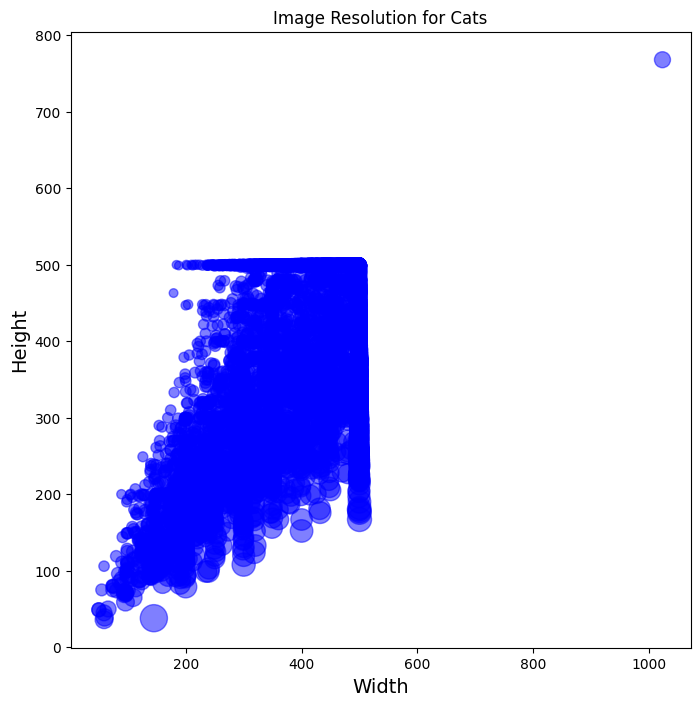

In [14]:
# Identify Image Resolutions

# Import Packages
import pandas as pd
from pathlib import Path
import imagesize

# Define root directory
root = '/content/dogs_vs_cats/train/cats'

# Get the Image Resolutions
img_paths = list(Path(root).glob("*.jpg"))
img_meta = {img.name: imagesize.get(img) for img in img_paths}

# Convert to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame(
    [(name, size[0], size[1], round(size[0] / size[1], 2)) for name, size in img_meta.items()],
    columns=["FileName", "Width", "Height", "Aspect Ratio"]
)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
print(img_meta_df.head())

# Visualize Image Resolutions

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution for Cats")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)


Total Nr of Images in the dataset: 10000
       FileName  Width  Height  Aspect Ratio
0  dog.9163.jpg    500     376          1.33
1  dog.6093.jpg    496     499          0.99
2  dog.4273.jpg    499     375          1.33
3  dog.6327.jpg    499     375          1.33
4  dog.3169.jpg    500     332          1.51


Text(0, 0.5, 'Height')

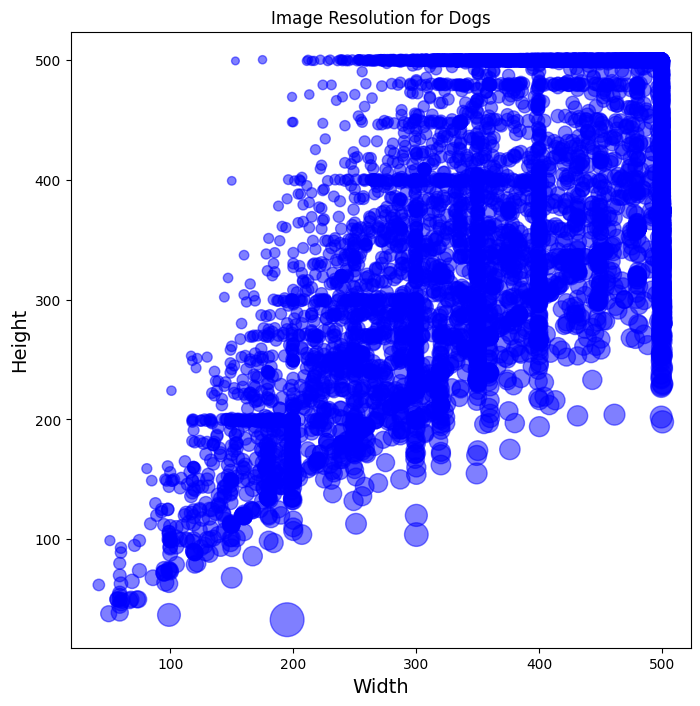

In [15]:
# Identify Image Resolutions

# Import Packages
import pandas as pd
from pathlib import Path
import imagesize

# Define root directory
root = '/content/dogs_vs_cats/train/dogs'

# Get the Image Resolutions
img_paths = list(Path(root).glob("*.jpg"))
img_meta = {img.name: imagesize.get(img) for img in img_paths}

# Convert to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame(
    [(name, size[0], size[1], round(size[0] / size[1], 2)) for name, size in img_meta.items()],
    columns=["FileName", "Width", "Height", "Aspect Ratio"]
)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
print(img_meta_df.head())

# Visualize Image Resolutions

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution for Dogs")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Set path to the dataset
base_dir = '/content/dogs_vs_cats/train'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_datagen

In [17]:
# Using training and validation generator
train_generator = train_datagen.flow_from_directory(
base_dir,
target_size =(150,150),
batch_size =20,
class_mode= "binary", # We use binary_crossentropy loss
subset="training") #set as traning data

Validation_generator = train_datagen.flow_from_directory(
base_dir,
target_size =(150,150),
batch_size =20,
class_mode= "binary", # We use binary_crossentropy loss
subset= "validation") #set as traning data




Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [18]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
validation_class_labels = Validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

Training class labels: {'cats': 0, 'dogs': 1}
Validation class labels: {'cats': 0, 'dogs': 1}


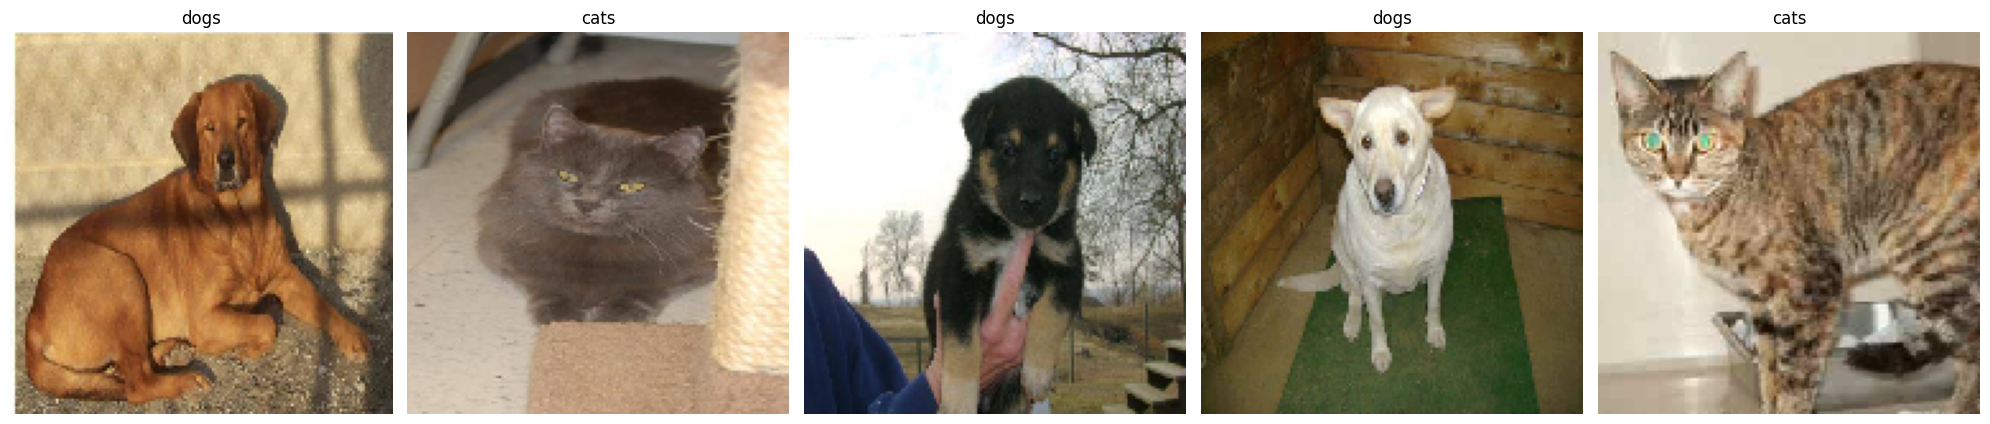

In [19]:
images, labels = next(train_generator)
images, labels
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plot_images_from_generator(generator, num_images=4):
    # Get a batch of images and labels from the generator
    images, labels = next(generator)

    # Set up the plot
    fig, axes = plt.subplots(1, num_images, figsize=(20,20))
    axes = axes.flatten()

    for img, label, ax in zip(images, labels, axes):
        # Image preprocessing might differ, adjust accordingly
        ax.imshow(img)
        # Set the title to the class label
        # Inverse the class indices dictionary to get class names from labels
        class_labels = dict((v,k) for k,v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Now, call this function with your training generator
plot_images_from_generator(train_generator, num_images=5)
train_generator.reset()

# CNN Model




In [20]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

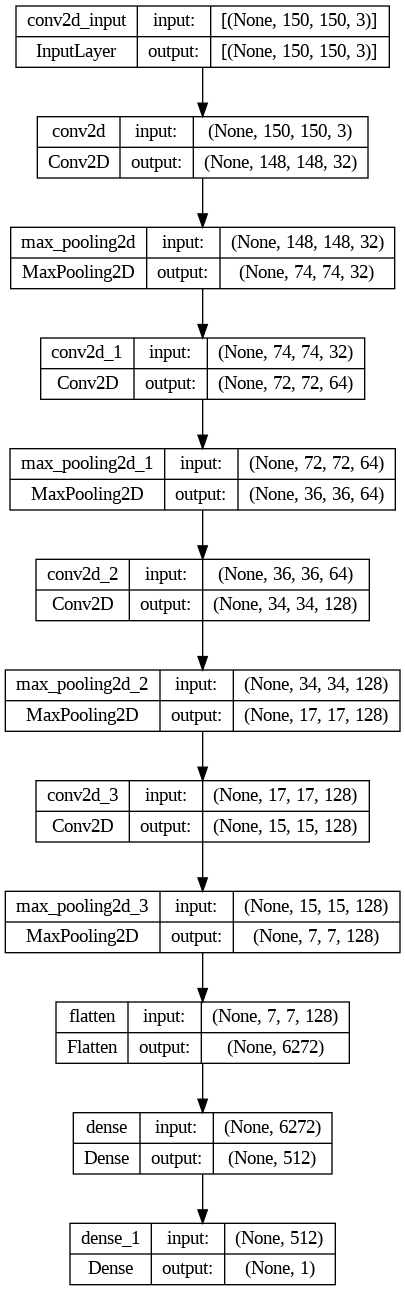

In [21]:
plot_model(model, to_file = 'Architecture.png',
           show_shapes=True, show_layer_names=True)

In [22]:
model.compile(loss ='binary_crossentropy',
              optimizer = "adam",
              metrics =['accuracy'])



In [23]:
batch_size =20
train_epochs_steps = np.ceil(train_generator.samples/batch_size)
validation_epochs_steps= np.ceil(Validation_generator.samples/batch_size)
print(train_epochs_steps, validation_epochs_steps)

800.0 200.0


In [24]:
# Early Stopping for classification
# mode opted val_accuracy
from keras.callbacks import EarlyStopping
es2 = EarlyStopping(monitor='val_accuracy', min_delta = 0.001, verbose=1,restore_best_weights=True)

In [25]:
Outcomes=model.fit(
train_generator,
steps_per_epoch = 800,
epochs = 15,
validation_data = Validation_generator,
verbose = 1,
validation_steps = 200,
callbacks = [es2]) #train_generator is train sample whereas validation_generator is test data

Epoch 1/15
800/800 [==============================] - 46s 50ms/step - loss: 0.6899 - accuracy: 0.5232 - val_loss: 0.6783 - val_accuracy: 0.5707
Epoch 2/15
800/800 [==============================] - 36s 45ms/step - loss: 0.6641 - accuracy: 0.5947 - val_loss: 0.6278 - val_accuracy: 0.6543
Epoch 3/15
800/800 [==============================] - 36s 45ms/step - loss: 0.5590 - accuracy: 0.7111 - val_loss: 0.5147 - val_accuracy: 0.7415
Epoch 4/15
800/800 [==============================] - 35s 44ms/step - loss: 0.4705 - accuracy: 0.7758 - val_loss: 0.4470 - val_accuracy: 0.7955
Epoch 5/15
800/800 [==============================] - 35s 44ms/step - loss: 0.4022 - accuracy: 0.8159 - val_loss: 0.4020 - val_accuracy: 0.8192
Epoch 6/15
800/800 [==============================] - 36s 45ms/step - loss: 0.3436 - accuracy: 0.8444 - val_loss: 0.3874 - val_accuracy: 0.8278
Epoch 7/15
800/800 [==============================] - 36s 45ms/step - loss: 0.2921 - accuracy: 0.8752 - val_loss: 0.3713 - val_accuracy:

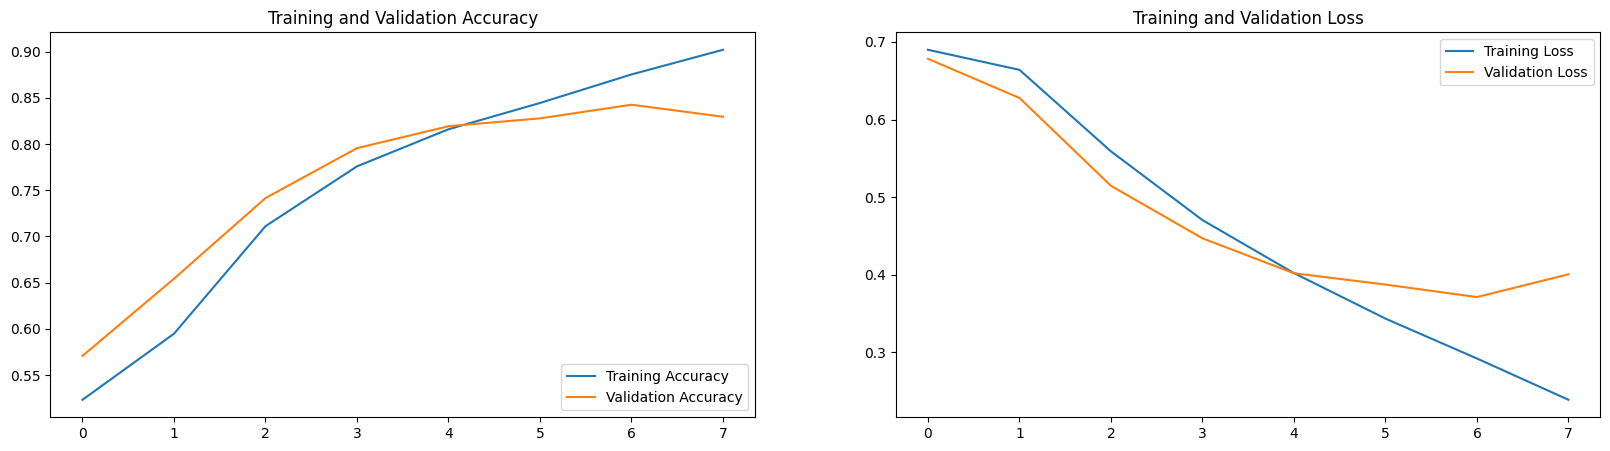

In [26]:
# Plotting the curve of traning parameters
# The best epoch is 6
acc = Outcomes.history['accuracy']
val_acc = Outcomes.history['val_accuracy']
loss = Outcomes.history['loss']
val_loss = Outcomes.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
print(epochs_range)

range(0, 8)


In [28]:
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = '/content/dogs_vs_cats/test'  # Path to your test directory

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,  # Can adjust based on your memory constraints
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    shuffle=False)  # No need to shuffle test data

Found 5000 images belonging to 2 classes.


In [29]:
np.ceil(test_generator.samples/test_generator.batch_size)

250.0

In [30]:
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))
probabilities

250/250 [==============================] - 10s 38ms/step


array([[0.07446084],
       [0.00249053],
       [0.50401884],
       ...,
       [0.99471223],
       [0.82959634],
       [0.58524966]], dtype=float32)

In [31]:
# Reset the test generator
test_generator.reset()

# Get the true labels
true_classes = test_generator.classes

# Predict probabilities for the positive class
probabilities = model.predict(test_generator,
                              steps=np.ceil(test_generator.samples/test_generator.batch_size))

# The output is the probability of the positive class,
# so we will threshold it at 0.5 to decide the predicted class
predicted_classes = (probabilities > 0.5).astype(int).squeeze()


# Class labels are just [0, 1] for binary classification, or you can use custom labels if you have them
class_labels = list(test_generator.class_indices.keys())
predicted_classes

250/250 [==============================] - 7s 30ms/step


array([0, 0, 1, ..., 1, 1, 1])

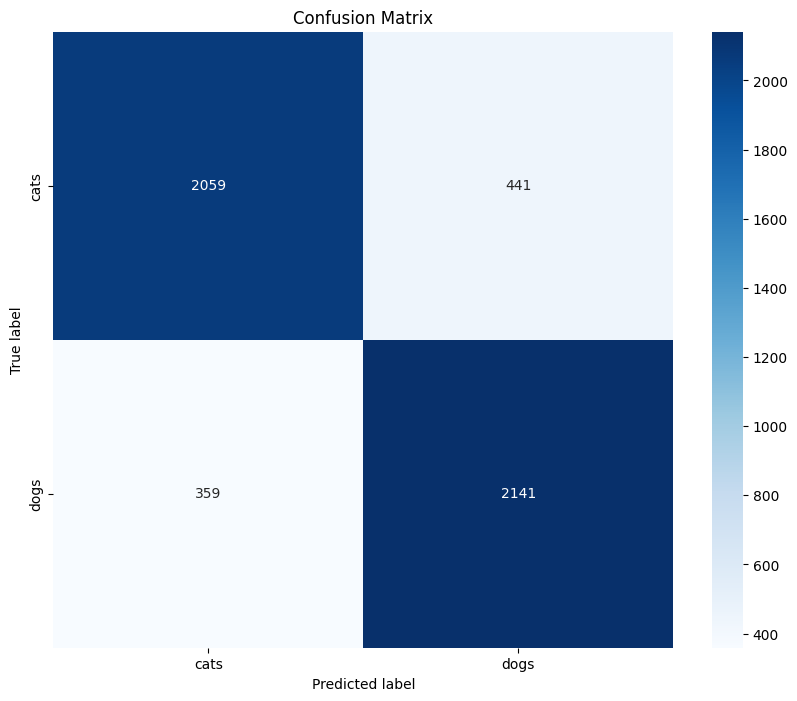

In [32]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [33]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Test loss: {loss:.2f}")

250/250 [==============================] - 8s 34ms/step - loss: 0.3657 - accuracy: 0.8400
Test accuracy: 84.00%
Test loss: 0.37


In [34]:
def make_prediction(image_path):
    img = load_img(img_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.  # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:", prediction)

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()

1/1 [==============================] - 0s 26ms/step
Prediction: [[0.66038275]]


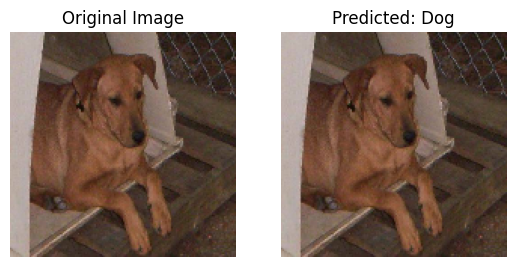

In [40]:
# Load and preprocess the image
img_path = '/content/dogs_vs_cats/test/dogs/dog.100.jpg'
make_prediction(img_path)



In [41]:
# Reset the test_generator before making predictions
test_generator.reset()

# Predict the whole test set
predictions = model.predict(test_generator, verbose=1)

# The predictions will be in the format of probabilities. You'll need to convert these to binary labels (0 or 1) based on a 0.5 threshold.
predicted_classes = (predictions > 0.5).astype(int).reshape(-1)
true_classes = test_generator.classes
misclassified_indices = np.where(predicted_classes != true_classes)[0]
misclassified_count = len(misclassified_indices)
print(f"Total misclassifications in the test set: {misclassified_count} out of {len(true_classes)}")

250/250 [==============================] - 7s 29ms/step
Total misclassifications in the test set: 800 out of 5000


250/250 [==============================] - 9s 34ms/step
Total misclassifications: 800


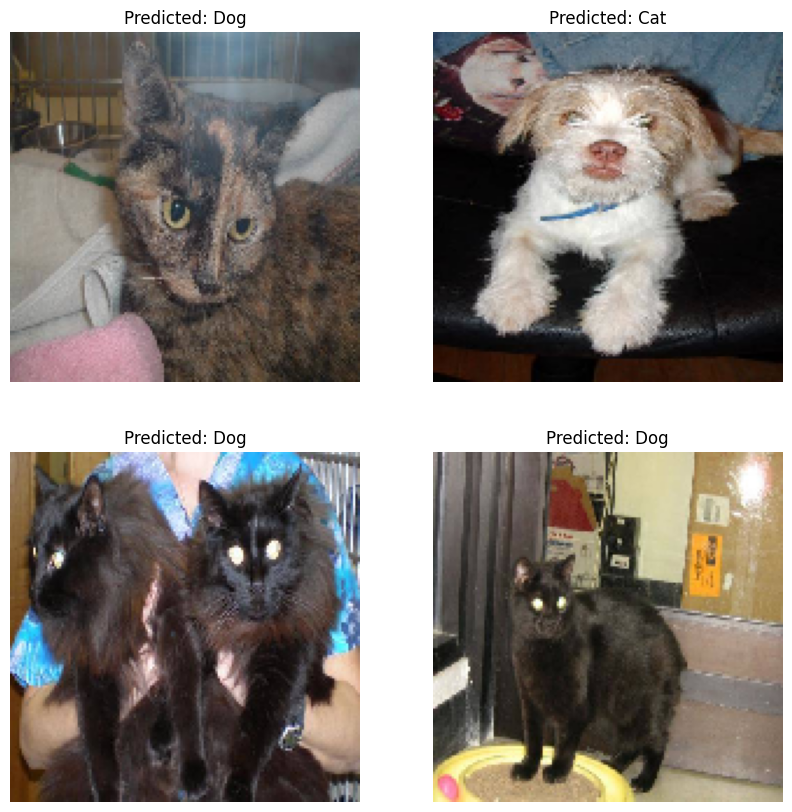

In [57]:
# Generate predictions for all test images
predictions = model.predict(test_generator)
# Convert predictions to binary (0 or 1) based on a 0.5 threshold
predicted_classes = predictions > 0.5 #True and false
# Retrieve the true labels from the generator
true_classes = test_generator.classes
# Filenames can also be useful for debugging
filenames = test_generator.filenames
# Identifying indices of misclassified images
misclassified_indices = np.where(predicted_classes.flatten() != true_classes)[0]

print(f"Total misclassifications: {len(misclassified_indices)}")


# Select a random subset of misclassified images
num_samples_to_display = 4
random_indices = random.sample(list(misclassified_indices), num_samples_to_display)

# Plot
plt.figure(figsize=(10, 10))
for i, index in enumerate(random_indices, 1):
    # Load image
    img_path = test_dir + '/' + filenames[index]
    img = load_img(img_path, target_size=(150, 150))

    # Predicted class
    predicted_class = "Dog" if predicted_classes[index] else "Cat"

    # Display
    plt.subplot(2, 2, i)
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
plt.show()

In [53]:
predicted_classes = predictions > 0.5
predicted_classes

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [55]:
true_classes = test_generator.classes
true_classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [56]:
misclassified_indices = np.where(predicted_classes.flatten() != true_classes)[0]

array([   2,    6,   21,   25,   31,   35,   37,   38,   42,   45,   48,
         52,   55,   61,   66,   67,   68,   70,   71,   74,   76,   78,
         93,  107,  113,  115,  118,  121,  122,  124,  129,  130,  134,
        137,  145,  151,  156,  167,  179,  193,  208,  227,  228,  234,
        242,  245,  248,  250,  254,  258,  262,  268,  280,  283,  285,
        289,  291,  296,  300,  306,  318,  322,  324,  327,  328,  336,
        339,  341,  348,  356,  360,  362,  365,  367,  373,  385,  390,
        398,  403,  404,  416,  437,  438,  441,  452,  453,  460,  461,
        462,  463,  464,  466,  477,  478,  480,  482,  485,  490,  497,
        508,  510,  512,  517,  519,  522,  525,  534,  541,  544,  550,
        562,  566,  575,  583,  594,  599,  602,  603,  605,  614,  637,
        647,  651,  653,  655,  667,  670,  672,  673,  675,  677,  679,
        682,  683,  684,  691,  696,  700,  706,  712,  717,  718,  722,
        732,  733,  752,  758,  759,  765,  770,  7

In [43]:
# Get all the layers in which conv is present.

for i in range(len(model.layers)):
	# check for convolutional layer
	if 'conv' not in model.layers[i].name:
		continue
	# get filter weights
	filters, biases = model.layers[i].get_weights()
	print("layer number",i,model.layers[i].name, filters.shape)

layer number 0 conv2d (3, 3, 3, 32)
layer number 2 conv2d_1 (3, 3, 32, 64)
layer number 4 conv2d_2 (3, 3, 64, 128)
layer number 6 conv2d_3 (3, 3, 128, 128)


In [44]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[2].get_weights()

In [46]:
filters.shape, bias.shape

((3, 3, 32, 64), (64,))

In [45]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

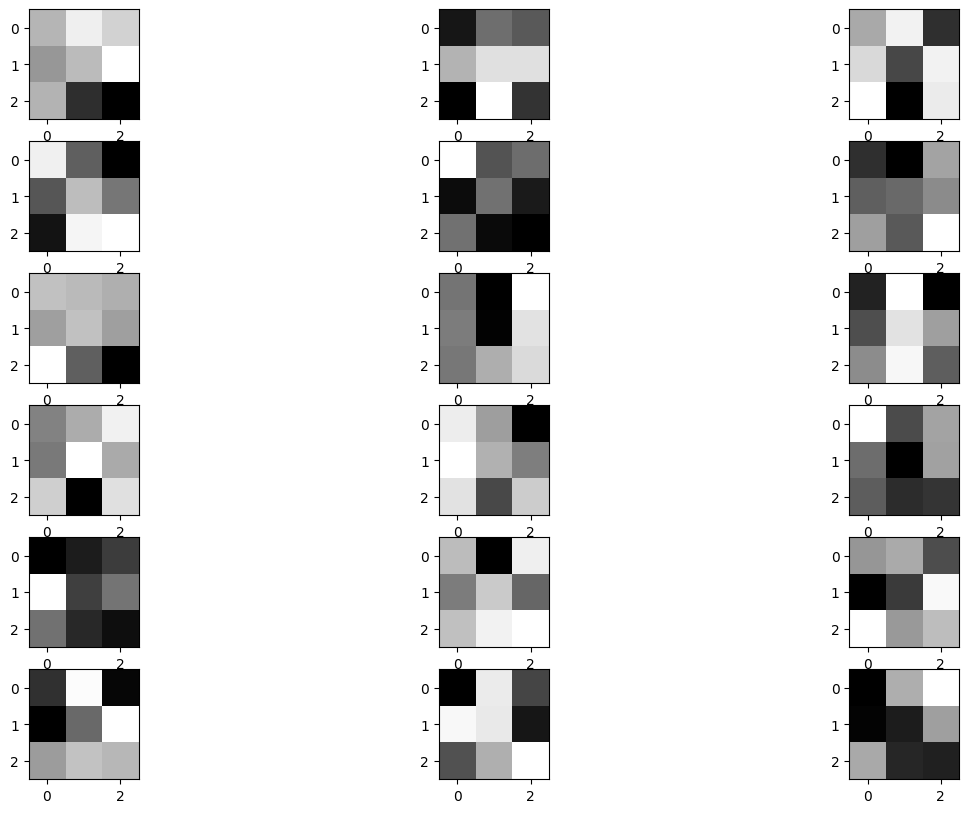

In [47]:
n_filters=6
ix=1
fig = plt.figure(figsize=(15,10))
for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot for 6 filters and 3 channels
        plt.subplot(n_filters,3,ix)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot the filters
plt.show()

1/1 [==============================] - 0s 35ms/step


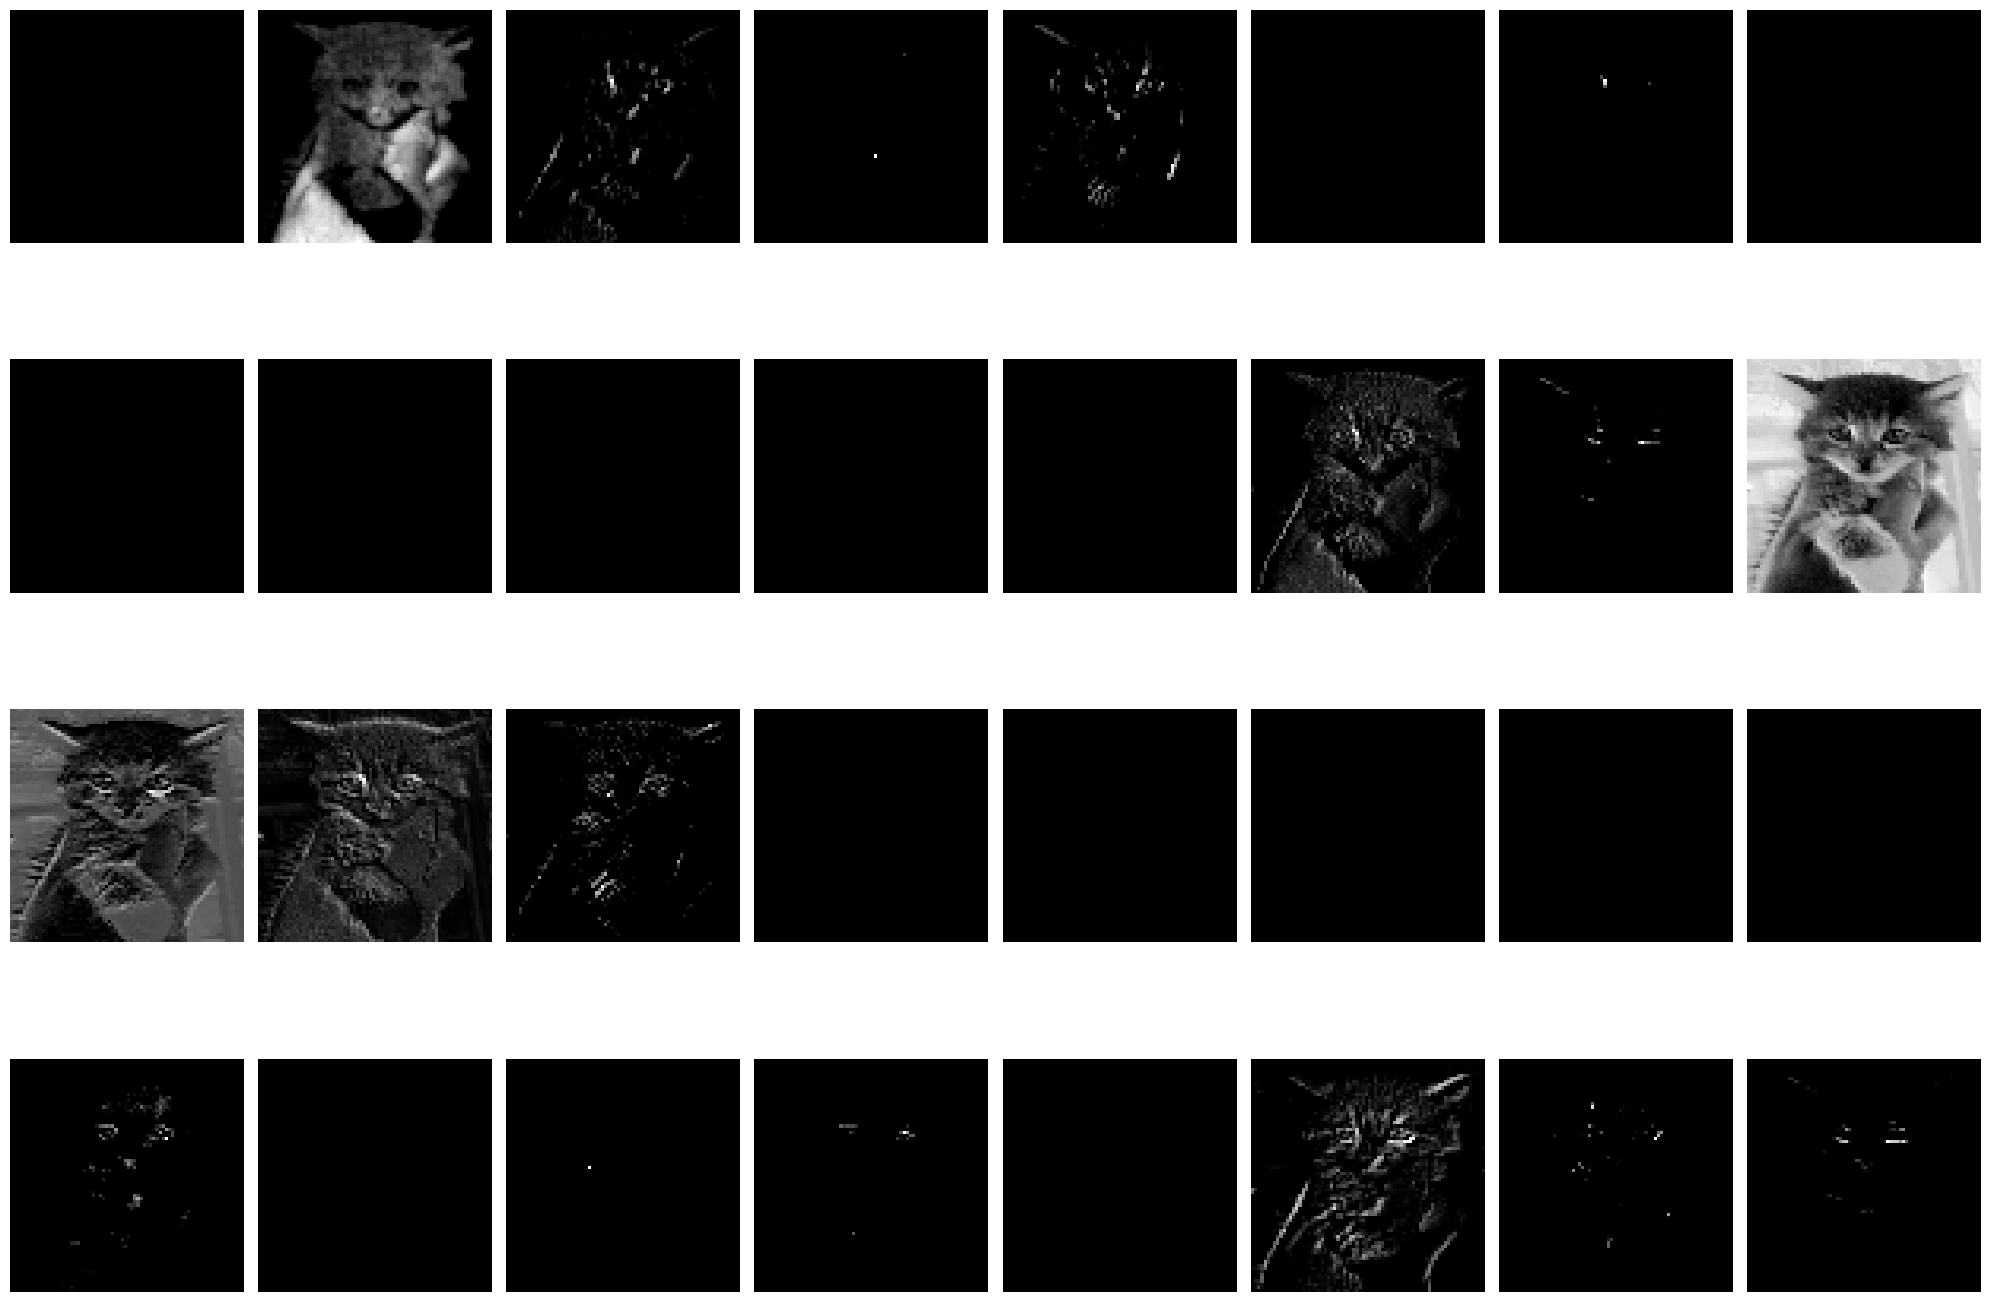

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

# Assuming 'model' is your pre-trained CNN model
model2 = tf.keras.Model(inputs=model.inputs, outputs=model.layers[1].output)

# Load and preprocess the image
image = load_img("/content/dogs_vs_cats/train/cats/cat.100.jpg", target_size=(150, 150))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.0

# Predicting using model2 to get the features from the desired layer
features = model2.predict(image)

# Calculate the number of grids dynamically
num_feature_maps = features.shape[-1]
num_cols = 8  # You can adjust this number based on your preference
num_rows = num_feature_maps // num_cols + (1 if num_feature_maps % num_cols else 0)

fig = plt.figure(figsize=(20, 15))
for i in range(1, num_feature_maps + 1):
    ax = fig.add_subplot(num_rows, num_cols, i)
    ax.imshow(features[0, :, :, i-1], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()